In [1]:
! conda install -y nb_conda



Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/mathiane/miniconda3

  added / updated specs:
    - nb_conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    argon2-cffi-20.1.0         |   py38h27cfd23_1          46 KB
    ca-certificates-2021.5.25  |       h06a4308_1         112 KB
    conda-4.10.1               |   py38h06a4308_1         2.9 MB
    importlib-metadata-3.10.0  |   py38h06a4308_0          33 KB
    ipython-7.22.0             |   py38hb070fc8_0         982 KB
    jupyter_core-4.7.1         |   py38h06a4308_0          68 KB
    markupsafe-2.0.1           |   py38h27cfd23_0          22 KB
    nb_conda-2.2.1             |           py38_1          33 KB
   

In [4]:
!conda info | grep 'active env'

     active environment : base
    active env location : /home/mathiane/miniconda3


In [5]:
! pip install environment_kernels

  Created wheel for environment-kernels: filename=environment_kernels-1.1.1-py3-none-any.whl size=30796 sha256=a33cd38f123ac118e51927705f1ac7bc556f059feb505b6a56cc1280c304045a
  Stored in directory: /home/mathiane/.cache/pip/wheels/d4/c6/ff/26eeec379303ffaf71ba975be8cc13e646c4ea601fb2c5bde6
Successfully built environment-kernels


In [8]:
! conda install -c -y anaconda ipykernel

usage: conda install [-h] [--revision REVISION] [-n ENVIRONMENT | -p PATH]
                     [-c CHANNEL] [--use-local] [--override-channels]
                     [--repodata-fn REPODATA_FNS] [--strict-channel-priority]
                     [--no-channel-priority] [--no-deps | --only-deps]
                     [--no-pin] [--copy] [-C] [-k] [--offline] [-d] [--json]
                     [-q] [-v] [-y] [--download-only] [--show-channel-urls]
                     [--file FILE] [--force-reinstall]
                     [--freeze-installed | --update-deps | -S | --update-all | --update-specs]
                     [-m] [--clobber] [--dev]
                     [package_spec [package_spec ...]]
conda install: error: argument -c/--channel: expected one argument


In [6]:
! conda activate ImgProcess


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [ ]:
#python -m ipykernel install --user --name ex --display-name "Python (ex)"


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_convergence = pd.read_csv('Res_64BS/convergence.csv')

In [3]:
df_convergence.head()

,epoch,metric,value
0,1,loss,1.237357
1,2,loss,0.876148
2,3,loss,0.651634
3,4,loss,0.624793
4,5,loss,0.633192


In [4]:
df_loss = df_convergence[df_convergence['metric'] == 'loss' ]

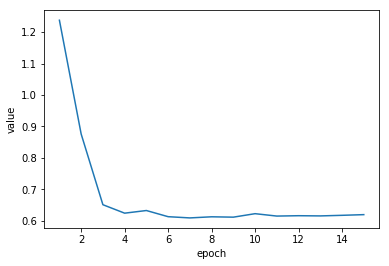

In [5]:
sns.lineplot(x=df_loss['epoch'], y=df_loss['value'], hue=None, size=None, style=None, data=df_loss)

In [6]:
df_error = df_convergence[df_convergence['metric'] == 'error' ]

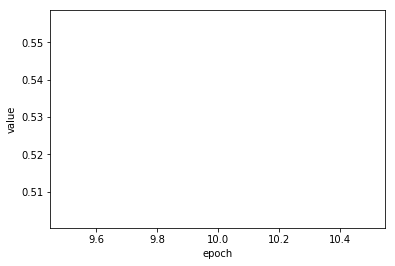

In [7]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [12]:
df_error = df_convergence[df_convergence['metric'] == 'fpr' ]

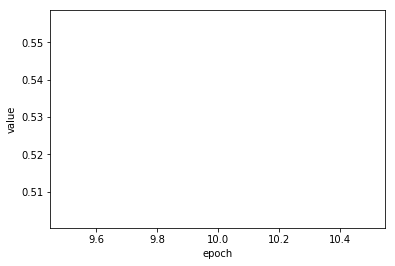

In [8]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [9]:
df_error = df_convergence[df_convergence['metric'] == 'fnr' ]

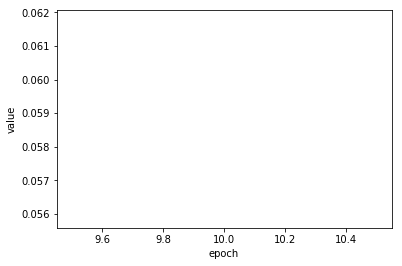

In [10]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [11]:
df_FPR_FNR = df_convergence[(df_convergence['metric'] == 'fpr') | (df_convergence['metric'] == 'fnr') ]

In [12]:
df_FPR_FNR.head()

,epoch,metric,value
11,10,fpr,1.000000
12,10,fnr,0.058824


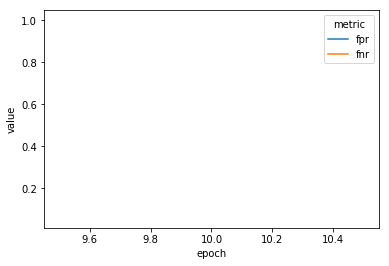

In [13]:
sns.lineplot(x=df_FPR_FNR['epoch'], y=df_FPR_FNR['value'], hue='metric', size=None, style=None, data=df_FPR_FNR)

In [14]:
### Show prediction 

In [3]:
df_proba_sample = pd.read_csv('Res_64BS/probability.csv')

In [16]:
df_proba_sample[df_proba_sample.index == 'TNE0075'].shape

(311, 3)

In [17]:
# Get the 5 tiles per slides with the highest_proba to be atypical
def tiles_highest_atypical_scores(df_proba_sample):
    sample = set(df_proba_sample.index)
    dict_sample_tiles_scores = {}
    for s in sample:
        print('SAMPLE  ', s)
        dict_sample_tiles_scores[s] = []
        sub_df = df_proba_sample[df_proba_sample.index == s]
        sub_df = sub_df.sort_values(by=['probability'], ascending = False)
        top_tiles =  sub_df.iloc[:5, 0]
        top_scores  =  sub_df.iloc[:5, -1]
        dict_sample_tiles_scores[s].append({'TopTiles' : top_tiles })
        dict_sample_tiles_scores[s].append({'TopScores' : top_scores })
        dict_sample_tiles_scores[s].append({'Targets' : sub_df.iloc[0, 1] })
    return dict_sample_tiles_scores
        

In [18]:
dict_sample_tiles_scores_ATYPICAL  = tiles_highest_atypical_scores(df_proba_sample)

SAMPLE   TNE1430
SAMPLE   TNE2142
SAMPLE   TNE1099
SAMPLE   TNE1422
SAMPLE   TNE0974
SAMPLE   TNE0810
SAMPLE   TNE0952
SAMPLE   TNE0985
SAMPLE   TNE1095
SAMPLE   TNE1080
SAMPLE   TNE2141
SAMPLE   TNE0288
SAMPLE   TNE1017
SAMPLE   TNE0520
SAMPLE   TNE1410
SAMPLE   TNE0522
SAMPLE   TNE1086
SAMPLE   TNE0521
SAMPLE   TNE1338
SAMPLE   TNE0286
SAMPLE   TNE1456
SAMPLE   TNE1414
SAMPLE   TNE1365
SAMPLE   TNE0287
SAMPLE   TNE1024
SAMPLE   TNE1450
SAMPLE   TNE1411
SAMPLE   TNE0944
SAMPLE   TNE0289
SAMPLE   TNE1413
SAMPLE   TNE0002
SAMPLE   TNE0408
SAMPLE   TNE0519
SAMPLE   TNE0075


In [19]:
dict_sample_tiles_scores_ATYPICAL

{'TNE1430': [{'TopTiles': TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE1430    0.997237
   TNE1430    0.997018
   TNE1430    0.996806
   TNE1430    0.996736
   TNE1430    0.996233
   Name: probability, dtype: float64},
  {'Targets': 1}],
 'TNE2142': [{'TopTiles': TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE2142    0.996736
   TNE2142    0.996233
   TN

In [20]:
# Get the 5 tiles per slides with the highest_proba to be atypical
def tiles_highest_typical_scores(df_proba_sample):
    sample = set(df_proba_sample.index)
    dict_sample_tiles_scores = {}
    for s in sample:
        print('SAMPLE  ', s)
        dict_sample_tiles_scores[s] = []
        sub_df = df_proba_sample[df_proba_sample.index == s]
        sub_df = sub_df.sort_values(by=['probability'], ascending = True)
        top_tiles =  sub_df.iloc[:5, 0]
        top_scores  =  sub_df.iloc[:5, -1]
        dict_sample_tiles_scores[s].append({'TopTiles' : top_tiles })
        dict_sample_tiles_scores[s].append({'TopScores' : top_scores })
        dict_sample_tiles_scores[s].append({'Targets' : sub_df.iloc[0, 1] })
    return dict_sample_tiles_scores
        

In [21]:
dict_sample_tiles_scores_TYPICAL  = tiles_highest_typical_scores(df_proba_sample)

SAMPLE   TNE1430
SAMPLE   TNE2142
SAMPLE   TNE1099
SAMPLE   TNE1422
SAMPLE   TNE0974
SAMPLE   TNE0810
SAMPLE   TNE0952
SAMPLE   TNE0985
SAMPLE   TNE1095
SAMPLE   TNE1080
SAMPLE   TNE2141
SAMPLE   TNE0288
SAMPLE   TNE1017
SAMPLE   TNE0520
SAMPLE   TNE1410
SAMPLE   TNE0522
SAMPLE   TNE1086
SAMPLE   TNE0521
SAMPLE   TNE1338
SAMPLE   TNE0286
SAMPLE   TNE1456
SAMPLE   TNE1414
SAMPLE   TNE1365
SAMPLE   TNE0287
SAMPLE   TNE1024
SAMPLE   TNE1450
SAMPLE   TNE1411
SAMPLE   TNE0944
SAMPLE   TNE0289
SAMPLE   TNE1413
SAMPLE   TNE0002
SAMPLE   TNE0408
SAMPLE   TNE0519
SAMPLE   TNE0075


In [22]:
dict_sample_tiles_scores_TYPICAL

{'TNE1430': [{'TopTiles': TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1430    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE1430    0.222708
   TNE1430    0.227228
   TNE1430    0.229838
   TNE1430    0.232375
   TNE1430    0.235380
   Name: probability, dtype: float64},
  {'Targets': 1}],
 'TNE2142': [{'TopTiles': TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE2142    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE2142    0.222708
   TNE2142    0.227228
   TN

In [23]:
import os
import shutil
def move_best__tiles(dict_sample_tiles_scores, outputdir, best_atypical = True):
    try:
        os.mkdir(outputdir)
    except:
        print('Outputdir already created ')
    for sample in dict_sample_tiles_scores.keys():
        sample_info = dict_sample_tiles_scores[sample]
        target_sample =  sample_info[2]['Targets']
        try:
            os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample)))
        except:
            print('sample folder already created ')
        
        
        if best_atypical:
            histo_type = 'Atypical'
            try:
                os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample), histo_type))
            except:
                print('sample folder already created ')
        else:
            histo_type = 'Typical'
            try:
                os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample), histo_type))
            except:
                print('sample folder already created ')
            
        tiles = sample_info[0]['TopTiles']
        probs = sample_info[1]['TopScores']
        for tile, prob in zip(tiles, probs):
            tile_names = tile.split('/')[-1].split('.')[0]
            outputname = tile_names + '__' + str(round(prob*100)) + '.'+ tile.split('/')[-1].split('.')[1]
            print(outputname)
            shutil.copy(tile, os.path.join(outputdir ,sample + '_'+ str(target_sample), histo_type,outputname))


In [24]:
move_best__tiles(dict_sample_tiles_scores_ATYPICAL, 'BestSortTilesVal_64BS', best_atypical = True)

TNE1430_66529_32341__100.jpg
TNE1430_22177_36037__100.jpg
TNE1430_24025_56365__100.jpg
TNE1430_51745_32341__100.jpg
TNE1430_50821_82237__100.jpg
TNE2142_45277_43429__100.jpg
TNE2142_56365_26797__100.jpg
TNE2142_67453_53593__99.jpg
TNE2142_68377_23101__99.jpg
TNE2142_25873_51745__99.jpg
TNE1099_12475_14323__100.jpg
TNE1099_42505_37885__100.jpg
TNE1099_20791_11551__99.jpg
TNE1099_27259_25411__99.jpg
TNE1099_48511_29107__99.jpg
TNE1422_53593_29569__100.jpg
TNE1422_47125_27721__99.jpg
TNE1422_53593_42505__99.jpg
TNE1422_56365_36961__99.jpg
TNE1422_55441_35113__99.jpg
TNE0974_34189_19867__100.jpg
TNE0974_39733_23563__99.jpg
TNE0974_20791_28645__99.jpg
TNE0974_24949_32803__99.jpg
TNE0974_29107_17095__99.jpg
TNE0810_24949_5545__99.jpg
TNE0810_13861_27721__99.jpg
TNE0810_12937_7393__99.jpg
TNE0810_13861_10165__99.jpg
TNE0810_9241_32341__99.jpg
TNE0952_25873_12937__99.jpg
TNE0952_20329_18481__99.jpg
TNE0952_9241_20329__99.jpg
TNE0952_30493_21715__99.jpg
TNE0952_7393_22639__98.jpg
TNE0985_6469_1

In [25]:
move_best__tiles(dict_sample_tiles_scores_TYPICAL, 'BestSortTilesVal_64BS', best_atypical = False)

Outputdir already created 
sample folder already created 
TNE1430_23101_71149__22.jpg
TNE1430_36961_79465__23.jpg
TNE1430_32341_9241__23.jpg
TNE1430_56365_81313__23.jpg
TNE1430_31417_10165__24.jpg
sample folder already created 
TNE2142_96097_39733__22.jpg
TNE2142_43429_39733__23.jpg
TNE2142_58213_33265__23.jpg
TNE2142_52669_13861__23.jpg
TNE2142_54517_66529__24.jpg
sample folder already created 
TNE1099_18481_28183__22.jpg
TNE1099_5083_18481__23.jpg
TNE1099_6469_24025__23.jpg
TNE1099_34651_5083__23.jpg
TNE1099_69301_18481__24.jpg
sample folder already created 
TNE1422_41581_33265__22.jpg
TNE1422_42505_22177__23.jpg
TNE1422_20329_44353__23.jpg
TNE1422_45277_22177__23.jpg
TNE1422_46201_26797__24.jpg
sample folder already created 
TNE0974_18943_25411__22.jpg
TNE0974_32341_17095__23.jpg
TNE0974_29107_34651__23.jpg
TNE0974_23563_32803__23.jpg
TNE0974_35575_15709__24.jpg
sample folder already created 
TNE0810_24025_6469__23.jpg
TNE0810_8317_15709__23.jpg
TNE0810_19405_27721__24.jpg
TNE0810_9

In [128]:
## Calculation overall accuracy

In [4]:
df_proba_sample = pd.read_csv('Res_64BS/probability.csv')

In [5]:
df_proba_sample.head()

,Sample,Tiles,target,probability
0,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.308092
1,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.354153
2,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.337643
3,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.268066
4,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.346144


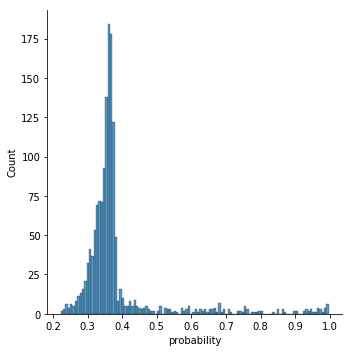

In [10]:
import seaborn as sns
df_proba_sample_c = df_proba_sample[df_proba_sample['Sample'] == 'TNE1095']
sns.displot(data =  df_proba_sample_c , x='probability')

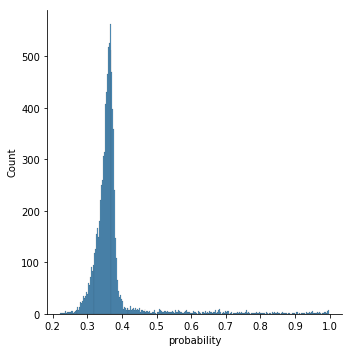

In [13]:
import seaborn as sns
df_proba_sample_c = df_proba_sample[df_proba_sample['Sample'] == 'TNE0286']
sns.displot(data =  df_proba_sample_c , x='probability')

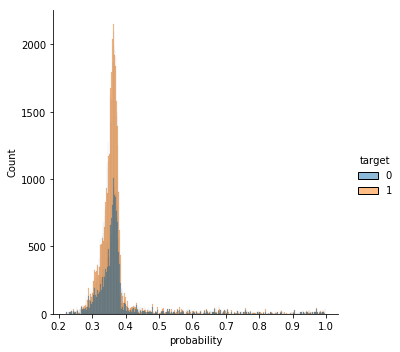

In [14]:
sns.displot(data =  df_proba_sample , x='probability', hue= 'target')

In [9]:
df_proba_sample_c.head()

,Sample,Tiles,target,probability
0,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.308092
1,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.354153
2,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.337643
3,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.268066
4,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.346144


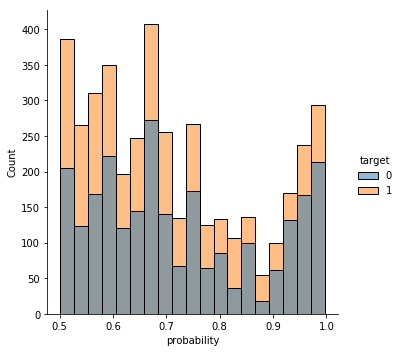

In [16]:
import seaborn as sns
df_proba_sample_p = df_proba_sample[df_proba_sample['probability'] > .5]
sns.displot(data =  df_proba_sample_p , x='probability', hue = 'target')